# Predicting Home Value for Zillow

by David Schneemann

## Project Goal

My goal with this project is to identify Zillow's key drivers of home value and to provide insight into why and how these factors are producing certain home values. With this information and the following recommendations, our organization can work together to improve business processes and procedures in order to more accurately predict home values moving forward.

## Project Description

At Zillow, the ability to predict home value is essential as new homes are built each year and some existing homes don't currently have assessed value within this database.

In order to more accurately predict home value, we will analyze the attributes (features) of homes within a predetermined set of data. This dataset includes Single Family Properties that had a transaction during 2017.
We will then develop models for predicting home value based on these attributes and provide recommendations and predictions to Zillow for improving prediction of home values moving forward.

## Initial Questions

#### 1. Does a higher number of bedrooms increase home value?

- Ho = More bedrooms translates to <= home value
- Ha = More bedrooms translates to > home value

#### 2. Does a higher number of bathrooms increase home value?

- Ho = More bathrooms translates to <= home value
- Ha = More bathrooms translates to > home value

#### 3. Do more garage spaces increase home value?

- Ho = More garage spaces translates to <= home value
- Ha = More garage spaces translates to > home value

#### 4. Does location by county affect home value?

- Ho = Orange county home values <= Ventura or LA County home values
- Ha = Orange county home values > Ventura or LA County home values

#### 5. Does a higher square footage increase home value?

- Ho = More sq_ft translates to <= home value
- Ha = More sq_ft translates to > home value

## Data Dictionary

In order to effectively meet our goals, the following module imports are required. \
Below is an extensive list of all modules I imported and used to create and complete the desired analysis for Zillow.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr, kruskal


from env import user, password, host
import acquire
import prepare
import explore

| Variable      | Meaning |
| ----------- | ----------- |
| home_value      | The total tax assessed value of the parcel       |
| bedrooms   | The total number of bedrooms in a home        |
| bathrooms      | The total number of bathrooms in a home       |
| garage_spaces      | The total number of car slots in a garage       |
| year_built      | The year the home was built       |
| location      | Location of a home by county      |
| sq_ft      | The total square feet of a home       |
| lot_sq_ft      | The total square feet of a property lot       |
| decade_built   | The decade in which the home was built       |
| county_encoded  | The location of a home by county, encoded     |

## Acquire Zillow Data

##### We acquire our data by utilizing my acquire.py file.
This file pulls my selected features from properties_2017 and joins them with propertylandusetype and predictions_2017. \
We use these tables only to limit our selection to Single Family Residences with a transaction in 2017. \
Our resulting sql query returns 56,079 entries of data with the following attributes.

In [2]:
# Calling my acquire function and assigning the output to df
df = acquire.wrangle_zillow()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56079 entries, 0 to 56078
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    56079 non-null  float64
 1   bathroomcnt                   56079 non-null  float64
 2   garagecarcnt                  55693 non-null  float64
 3   yearbuilt                     55830 non-null  float64
 4   taxamount                     55949 non-null  float64
 5   fips                          56079 non-null  float64
 6   calculatedfinishedsquarefeet  55848 non-null  float64
 7   taxvaluedollarcnt             56071 non-null  float64
 8   lotsizesquarefeet             55729 non-null  float64
dtypes: float64(9)
memory usage: 3.9 MB


## Prepare Zillow Data

##### We prepare our data by utilizing my prepare.py file.
This file:
- Handles null values
- Converts some variables to integers for optimization
- Handles outliers
- Cleans variables, including dropping `taxamount` and renaming columns
- Includes feature engineering to encode location via `fips`
- Splits prepared df into train, validate, test, and associated dfs on x and y

Our resulting dataframes are ready for exploration and evaluation.

In [4]:
# Calling my prepare function and assigning the output to the following variables
df, train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = prepare.prep_zillow(df)

In [36]:
# Checking shape on our samples to confirm appropriate split
print(train.shape)
print(validate.shape)
print(test.shape)

(29715, 11)
(12735, 11)
(10613, 11)


In [37]:
# Visualizing our dataframe to confirm successful acquisition and preparation
train.head()

,bedrooms,bathrooms,garage_spaces,year_built,location,sq_ft,home_value,lot_sq_ft,decade_built,county_encoded,baseline
52851,4,3.5,3.0,2006,Orange County,2499,908648,3274.0,2000s,1,377672.367962
48185,2,3.0,3.0,1938,LA County,2186,120760,7325.0,30s,0,377672.367962
25784,3,3.0,3.0,1951,LA County,1860,136808,6251.0,50s,0,377672.367962
45999,3,2.0,2.0,1950,LA County,1890,297111,8092.0,50s,0,377672.367962
21886,2,2.0,2.0,1946,LA County,1317,327137,6217.0,40s,0,377672.367962


## Set the Data Context

#### Note: Not all visuals, analysis, and work is shown within this Final Report. 
#### All my work, from start to finish, is available in my `working_notebook.ipynb` file for your reference.

Our acquired and prepared dataset contains information for 53,063 homes. \
    In the process of exploring this data and setting initial hypotheses, I created a figure plotting choice categorical variables with our target variable of `home_value`. Using this figure I determined potential correlation with each of the features stated in my initial hypotheses. The following exploration seeks to answer these questions.

## Exploratory Analysis
I now take each of my initial hypotheses in turn, answering them using visualizations and statistical analysis. \
I utilize an `explore.py` file in order to abstract repetitive code away from this Final Report. \
Additionally, for the sake of time, I won't show each question, analysis, and answer within this Final Report. 

### 1. Does a higher number of bedrooms increase home value?
- Ho = More bedrooms translates to <= home value
- Ha = More bedrooms translates to > home value

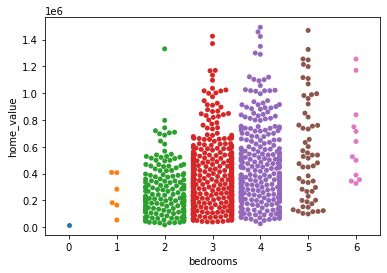

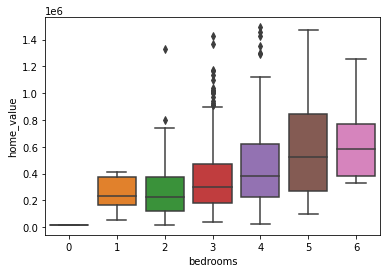

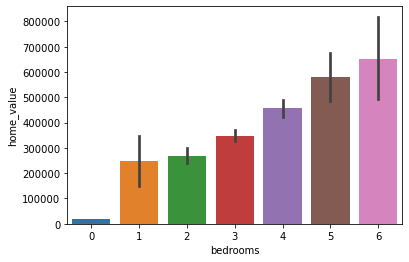

In [7]:
# Applying plot function to 'bedrooms' and 'home_value'
explore.plot_categorical_and_continuous_vars(df, 'bedrooms', 'home_value')

#### Statistical Analysis

In [8]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_bed , p_bed = pearsonr(x = train['bedrooms'], y = train['home_value'])

r_bed , p_bed

if p_bed < alpha:
    print('The number of bedrooms is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_bed))
else:
    print('The number of bedrooms is NOT correlated with home value.')

The number of bedrooms is correlated with home value.
The correlation coefficient is 0.2658468613001996.


#### Answer 1 : Yes,  higher numbers of bedrooms correlate with higher home value
Following our statistical test, we indicate that this feature is correlated with home value, meaning that there is statistical significance behind the claim that more bedrooms results in a higher home value. Thus we move forward with this feature.

### 2.  Does a higher number of bathrooms increase home value?
- Ho = More bathrooms translates to <= home value
- Ha = More bathrooms translates to > home value

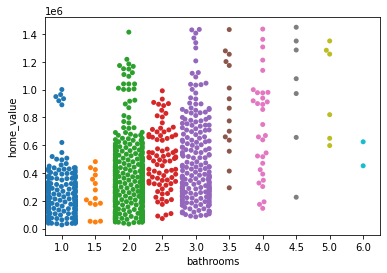

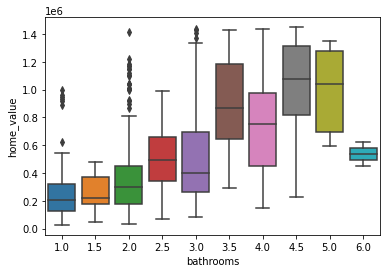

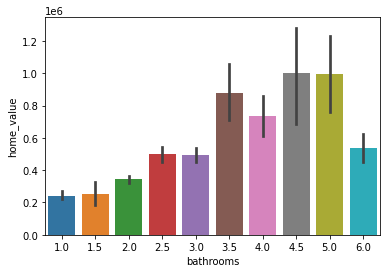

In [9]:
# Applying plot function to 'bathrooms' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'bathrooms', 'home_value')

In [10]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_bath , p_bath = pearsonr(x = train['bathrooms'], y = train['home_value'])

r_bath , p_bath

if p_bath < alpha:
    print('The number of bathrooms is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_bath))
else:
    print('The number of bathrooms is NOT correlated with home value.')

The number of bathrooms is correlated with home value.
The correlation coefficient is 0.48859033755382986.


#### Answer 2: Yes,  higher numbers of bathrooms correlate with higher home value
Following our statistical test, we indicate that this feature is correlated with home value, meaning that there is statistical significance behind the claim that more bathrooms results in a higher home value. Thus we move forward with this feature.

### 3. Do more garage spaces increase home value?

- Ho = More garage spaces translates to <= home value
- Ha = More garage spaces translates to > home value

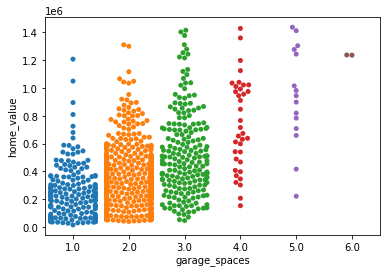

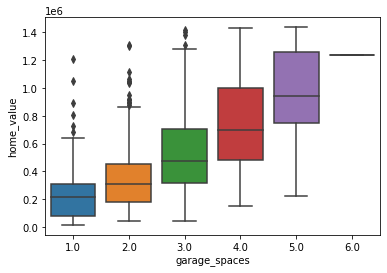

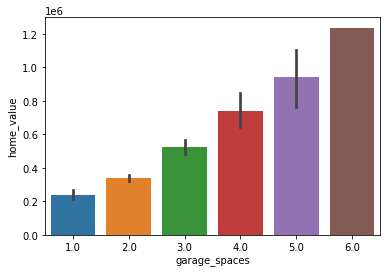

In [11]:
# Applying plot function to 'garage_spaces' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'garage_spaces', 'home_value')

In [12]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_garage , p_garage = pearsonr(x = train['garage_spaces'], y = train['home_value'])

r_garage , p_garage

if p_garage < alpha:
    print('The number of garage spaces is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_garage))
else:
    print('The number of garage spaces is NOT correlated with home value.')

The number of garage spaces is correlated with home value.
The correlation coefficient is 0.4658324011706713.


#### Answer 3: Yes, higher numbers of garage spaces correlate with higher home value
Following our statistical test, we indicate that this feature is correlated with home value, meaning that there is statistical significance behind the claim that more garage spaces results in a higher home value. Thus we move forward with this feature.

### 4. Does location by county affect home value?

- Ho = Population Means of the Home Values for Orange county, LA County, and Ventura County are all equal
- Ha = Population Means of the Home Values for Orange county, LA County, and Ventura County are NOT all equal

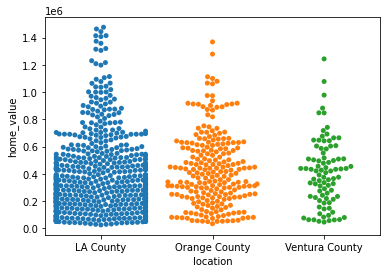

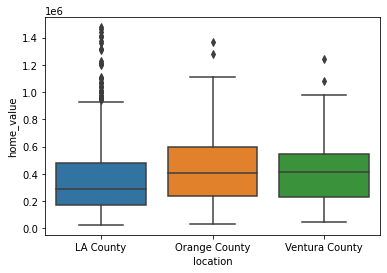

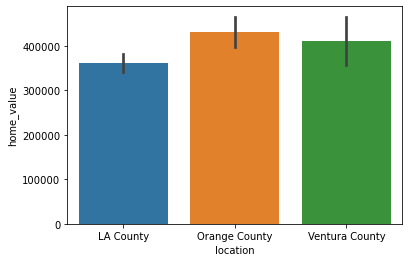

In [13]:
# Applying plot function to 'location' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'location', 'home_value')

In [14]:
# Assigning separate dfs to select only values within a certain county code
Orange = train[train.location == 'Orange County'].home_value
LA = train[train.location == 'LA County'].home_value
Ventura = train[train.location == 'Ventura County'].home_value

In [15]:
# ANOVA test for comparing 3 separate cat vars
f, p = stats.f_oneway(Orange, LA, Ventura)
f, p

print(f'f-statistic by ANOVA Test: {f}, p-value: {p}')

# set alpha : 0.05
if p < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

f-statistic by ANOVA Test: 292.7573652142797, p-value: 1.2406052252144863e-126
We can reject the null hypothesis


#### Answer 4: Yes, location by county does affect home value
Following our statistical test, we reject the null, meaning that there is statistical significance behind the claim that the population means of the Home Values for each county are NOT equal. Thus we move forward with this feature.

### 5. Does a higher square footage increase home value?

- Ho = More sq_ft translates to <= home value
- Ha = More sq_ft translates to > home value

<Figure size 432x288 with 0 Axes>

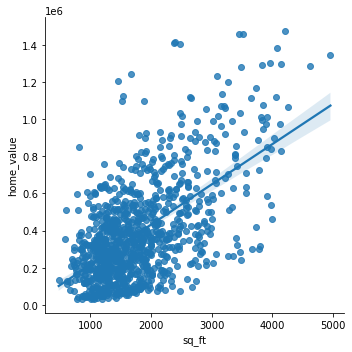

In [16]:
# Applying two continuous vars plot function to 'sq_ft' and 'home_value'
explore.plot_continuous_and_continuous_vars(train, 'sq_ft', 'home_value')

In [17]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r_sf, p_sf = pearsonr(train['sq_ft'], train['home_value'])

r_sf, p_sf

print(f'Correlation Coefficient by Pearson Test: {r_sf}, p-value: {p_sf}')

# set alpha : 0.05
if p_sf < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

Correlation Coefficient by Pearson Test: 0.5622779055862923, p-value: 0.0
We can reject the null hypothesis


#### Answer 5: Yes, higher square footage correlates with an increase in home value
Following our statistical test, we reject the null, meaning that there is statistical significance behind the claim that the population means of the Home Values for each county are NOT equal. Thus we move forward with this feature.

### Summary: Which are the best predictors of home value?

#### Key Takeaways
##### All 5 features I explored have been shown to have correlation with home value, thus I'll move forward with these features to modeling:
- `bedrooms` 
- `bathrooms` 
- `garage_spaces` 
- `location` (aka `county_encoded` for modeling)
- `sq_ft` 

##### In an attempt to produce the most accurate models possible, I will drop the following extraneous features:
- `year_built`
- `lot_sq_ft`
- `decade_built`

## Predicting Home Value

### Scaling
I have chosen a MinMax Scaler upon which to scale my data. After comparing this and other scalers, I determined MinMax to provide the best results

In [18]:
#Import dependencies
from sklearn.preprocessing import MinMaxScaler

#Define function to scale all data based on the train subset
def scale_data(train, validate, test):
    
    scale_columns = ['bedrooms', 'bathrooms', 'garage_spaces', 'sq_ft']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    mms = MinMaxScaler()
    
    mms.fit(train[scale_columns])
    
    train_scaled[scale_columns] = mms.transform(train[scale_columns])
    validate_scaled[scale_columns] = mms.transform(validate[scale_columns])
    test_scaled[scale_columns] = mms.transform(test[scale_columns])
    
    return train_scaled, validate_scaled, test_scaled

In [19]:
# Assigning df variables to our called function, `scale_data`
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

#### Now that we have our data scaled, I will:
- Remove the extraneous features mentioned in the exploration summary
- Split our scaled train, validate, and test on x and y

In [20]:
# Dropping extraneous features no longer relevant to modeling
train_scaled = train_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])
validate_scaled = validate_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])
test_scaled = test_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])

In [21]:
# Splitting train, validate, and test dfs on x and y FOR SCALED DF
x_train_scaled = train_scaled.drop(columns=['home_value'])
x_validate_scaled = validate_scaled.drop(columns=['home_value'])
x_test_scaled = test_scaled.drop(columns=['home_value'])

y_train_scaled = train_scaled['home_value']
y_validate_scaled = validate_scaled['home_value']
y_test_scaled = test_scaled['home_value']

#### Baseline
In order to compare our models, I'll create a baseline from our train dataset actual home values

In [22]:
#Establish baselines for the train and validation datasets
baseline = train['home_value'].mean()

# Create new columns for baseline
train['baseline'] = baseline
validate['baseline'] = baseline
test['baseline'] = baseline

# Find RMSE for each sample
train_rmse = sqrt(mean_squared_error(train['home_value'], train.baseline))
validate_rmse = sqrt(mean_squared_error(validate['home_value'], validate.baseline))
test_rmse = sqrt(mean_squared_error(test['home_value'], test.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(validate_rmse))
print('Test baseline RMSE: {}.'.format(test_rmse))

Train baseline RMSE: 272118.84506691294.
Validation baseline RMSE: 268096.9138598306.
Test baseline RMSE: 270460.22757535306.


I'll now create:
- `train_predictions` df for our train predictions 
- `predictions` df for our validate predictions

In [23]:
# Creating dfs for train and validate predictions
train_predictions = pd.DataFrame({
    'actual': train['home_value'],
    'baseline': baseline
}) 

predictions = pd.DataFrame({
    'actual': validate['home_value'],
    'baseline': baseline
}) 

### Fit 3 Best Models
- Linear Regression (`simple_lm`)
- Lasso-Lars Regression (`lasso_lars`)
- TweediRegressor (`glm`)

#### Fitting Linear Regression

In [24]:
# Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predicting on train and validate and adding column to both predictions dfs 
train_predictions['simple_lm'] = lm.predict(x_train_scaled)
predictions['simple_lm'] = lm.predict(x_validate_scaled)

#### Fitting Lasso-Lars Regression

In [25]:
# Create the model object
lars = LassoLars(alpha=1)

# Fit the model to our training data
lars.fit(x_train_scaled, y_train_scaled)

# predict train
train_predictions['lasso_lars'] = lars.predict(x_train_scaled)

# Predict validate
predictions['lasso_lars'] = lars.predict(x_validate_scaled)

#### Fitting TweediRegressor

In [26]:
# Create the model object
glm = TweedieRegressor(power=0, alpha=1)

# Fit the model to our training data
glm.fit(x_train_scaled, y_train_scaled)

# predict train, add to df
train_predictions['glm'] = glm.predict(x_train_scaled)

# Predict validate, add to df
predictions['glm'] = glm.predict(x_validate_scaled)

#### Evaluating Models using root mean squared error (RMSE)
In order to choose our best model to predict on our test df, we will compare our models using RMSE values to determine which mean error is closest to actual. This is our best evaluation metric because it allows us to see and compare against the actual units of our target variable (dollars).

In [27]:
# Calculate root mean squared error (RMSE) for every column in the train_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(train_predictions.actual, y_predicted))

print('Train baseline RMSE: {}.'.format(train_rmse))
train_predictions.apply(calculate_rmse).sort_values()

Train baseline RMSE: 272118.84506691294.


actual             0.000000
simple_lm     221910.865863
lasso_lars    221921.119966
glm           259201.362112
baseline      272118.845067
dtype: float64

In [28]:
# Calculate root mean squared error (RMSE) for every column in the predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(predictions.actual, y_predicted))

print('Validation baseline RMSE: {}.'.format(validate_rmse))
predictions.apply(calculate_rmse).sort_values()

Validation baseline RMSE: 268096.9138598306.


actual             0.000000
simple_lm     217319.455730
lasso_lars    217338.051334
glm           255170.615728
baseline      268096.913860
dtype: float64

##### Model Conclusion: 
Based on comparing our train and validate predictions, we can say with confidence that Linear Regression (`simple_lm`) is our best performing model. We will now predict and evaluate this model on our test dataset

### Predict and Evaluate Test dataset
Like with train and validate, I'll create a predictions df to collect predictions and then evaluate.

In [29]:
test_predictions = pd.DataFrame({
    'actual': test['home_value'],
    'baseline': baseline
}) 

In [30]:
#Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predict on test
test_predictions['simple_lm'] = lm.predict(x_test_scaled)

test_predictions.head()

,actual,baseline,simple_lm
21816,79477,377672.367962,399792.291476
29518,611458,377672.367962,611638.158403
49732,324879,377672.367962,215360.414827
41274,59652,377672.367962,278717.963066
47604,215371,377672.367962,395783.936060


In [32]:
# Calculate root mean squared error (RMSE) for the test_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(test_predictions.actual, y_predicted))

print('Test baseline RMSE: {}.'.format(test_rmse))
test_predictions.apply(calculate_rmse).sort_values()

Test baseline RMSE: 270460.22757535306.


actual            0.000000
simple_lm    222613.258374
baseline     270460.227575
dtype: float64

**Success!** \
From this calculation on our test dataset, we can observe that my Linear Regression model successfully beat our baseline.

**Our model performs 21% better than baseline**

## Conclusion

### Summary

In seeking solutions to more accurately predict home value for Zillow, we have explored a multiplicity of factors in the dataset that affect home value. We have shown that some potential primary drivers of home value are :

- The number of bedrooms in a home
- The number of bathrooms in a home 
- The number of garage spaces in a home
- The location of a home by county
- The square footage of a home

The correlation of these features with home value, combined within our analysis and models, expresses 95% confidence in the validity of our findings. We have created robust models that perform significantly better than our baseline estimated error of 270,460.

Having fit the best performing model to our train, validate, and test datasets, we expect this model to perform 21% better than our baseline in the future on data it has not seen, given no major changes to our data source.

### Recommendations

There are a number of recommendations that can be offered based on the above analysis. These suggestions are tied to the findings within our primary drivers of home value:

1. Based on our exploration of bedroom and bathroom counts, collecting additional data on how many rooms are in a home, including more specific data on living spaces versus kitchens and other spaces
2. Kitchen data, namely which major appliances and amenities are available
3.

### Next Steps

Despite the overall effectiveness of our best-performing model, there is always room for improvement and optimization. \
If given more time to pursue a better results, I would begin by conducting further exploration and analysis of other features within our dataset. These features could include:
- Whether a home has a pool
- The square footage of the property, not just the home

In addition to exploring other features, I would look into methods for more appropriately separating our data into additional housing categories. For example:
- Calculating a ratio of home square footage against square footage of the entire property. This home to property ratio could be valuable.
- 
